### Logistic Regression 

#### Numpy 实现 

In [1]:
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# sigmoid function 
def sigmoid(x): 
    """
    x is an array  
    
    the sigmoid function can help transfer the linear equation eg.w^TX + b between (0,1) 
    """ 
    z =  1/ (1+np.exp(-x)) 
    
    return z 

In [3]:
# initialize the parameters 
def initialize_params(dims): 
    """ 
    dims is the dimension of the input array 
    """ 
    
    W = np.zeros((dims,1)) 
    b = 0 
    
    return W, b 

In [15]:
# logistic regression 
def logistic(X,y,W,b): 
    """
    X is feature 
    y is label 
    w is parameter 
    b is bias 
    """ 
    # number of samples
    num_train = X.shape[0] 
    # number  of features 
    num_feature = X.shape[1] 
    # logistics regression output yhat
    a = sigmoid(np.dot(X,W)+b) 
    # cost function or loss function  
    cost = -1/num_train * np.sum(y*np.log(a) + (1-y)*np.log(1-a)) 
    # weight  gradient  
    # dw = d(loss)/dw
    dW = np.dot(X.T,(a-y))/num_train 
    # bias gradient 
    db = np.sum(a-y)/ num_train 
    # squeeze 
    cost = np.squeeze(cost) 
    
    return a,cost,dW,db 

In [16]:
# training 
def logistic_train(X,y,learning_rate,epochs): 
    """ 
    X - feature 
    y - label 
    learning_rate 
    epochs - number of training 
    """ 
    # initialize the parameters 
    W,b = initialize_params(X.shape[1]) 
    # initialize the loss/ cost list 
    cost_list = [] 
    # train 
    for i in range(epochs): 
        a, cost,dW,db  = logistic(X,y,W,b) 
        #  update the parameter 
        W =W - learning_rate * dW 
        b = b - learning_rate * db 
        
        # record the loss 
        if i%100 ==0: 
            cost_list.append(cost)  
        if i%100==0:
            print('epoch %d cost %f'%(i,cost)) 
            
    params = {'W':W ,'b':b} 
    grads = {'dW':dW,'db':db} 
    
    return cost_list,params,grads 

In [29]:
# prediction function 
def predict(X,params): 
    """
    X feature 
    params 训练好的参数 
    """ 
    y_pred = sigmoid(np.dot(X,params['W']) + params['b']) 
    
    # transfer the probability to 0 or 1 
    for i in range(len(y_pred)): 
        if y_pred[i] > 0.5: 
            y_pred[i] = 1 
        else: 
            y_pred[i]  = 0 
    return y_pred 

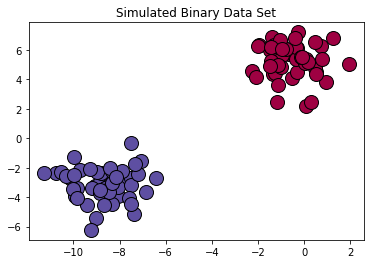

In [30]:
# 生成二分类数据集 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

X,labels = make_blobs(
    n_samples = 100, 
    n_features = 2, 
    random_state =1,
    centers = 2) 
rng = np.random.RandomState(2) 
X +=2*rng.uniform(size = X.shape) 
unique_labels = set(labels) 
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels))) 
#
for k,col in zip(unique_labels,colors): 
    x_k = X[labels ==k] 
    plt.plot(x_k[:,0],x_k[:,1],'o', 
             markerfacecolor = col, 
             markeredgecolor = 'k', 
             markersize = 14) 
plt.title('Simulated Binary Data Set') 
plt.show() 

In [31]:
# train test split 
offset = int(X.shape[0]*0.9) 
X_train,y_train = X[:offset],labels[:offset] 
X_test,y_test = X[offset:],labels[offset:] 
y_train = y_train.reshape(-1,1) 
y_test = y_test.reshape(-1,1) 

print('X_train = ',X_train.shape) 
print('X_test = ',X_test.shape) 
print('y_train=',y_train.shape) 
print('y_test=',y_test.shape) 

X_train =  (90, 2)
X_test =  (10, 2)
y_train= (90, 1)
y_test= (10, 1)


In [32]:
# train 
cost_list,params,grads = logistic_train(X_train,y_train,0.01,1000) 

epoch 0 cost 0.693147
epoch 100 cost 0.050674
epoch 200 cost 0.027877
epoch 300 cost 0.019704
epoch 400 cost 0.015437
epoch 500 cost 0.012793
epoch 600 cost 0.010982
epoch 700 cost 0.009658
epoch 800 cost 0.008645
epoch 900 cost 0.007843


In [33]:
print(params) 

{'W': array([[-0.40980584],
       [-1.02708625]]), 'b': -0.12992063430830156}


In [34]:
print(grads) 

{'dW': array([[0.00604689],
       [0.02314078]]), 'db': 0.0045814658222318476}


In [35]:
y_pred = predict(X_test,params) 
print(y_pred) 

[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]]


In [36]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



#### sklearn 实现 

In [37]:
from sklearn.linear_model import LogisticRegression as LR 
clf = LR(random_state = 0).fit(X_train,y_train) 
y_pred = clf.predict(X_test) 
print(y_pred) 

[1 0 0 0 1 1 1 0 1 0]


In [38]:
y_test 

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0]])